<a href="https://colab.research.google.com/github/Lailaasayed/sales_data/blob/main/sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# display plots in the notebook itself
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/sales_data.csv')
df.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0



## Data Cleaning




In [ ]:
#check duplicate
df.duplicated().sum()

1

In [ ]:
#remove duplicate
df.drop_duplicates()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [ ]:
#check missing values
df.isna().sum()


date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [ ]:
df = df.dropna(how="any")
df.isna().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

## Ask about Questions

In [ ]:
df.describe()

,price,quantity,revenue
count,365.000000,365.000000,365.000000
mean,210.191781,14.520548,2050.493151
std,227.043145,8.560883,1903.190865
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,200.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


what is the total revenue generated by the company over the course of the year?

In [ ]:
total_revenue = df['revenue'].sum()
print("total revenue generated by the company over the course of the year is: ",total_revenue)

total revenue generated by the company over the course of the year is:  748430.0


What is highest revenue generated by the company over the course of the year?

highest revenue is:  427800.0


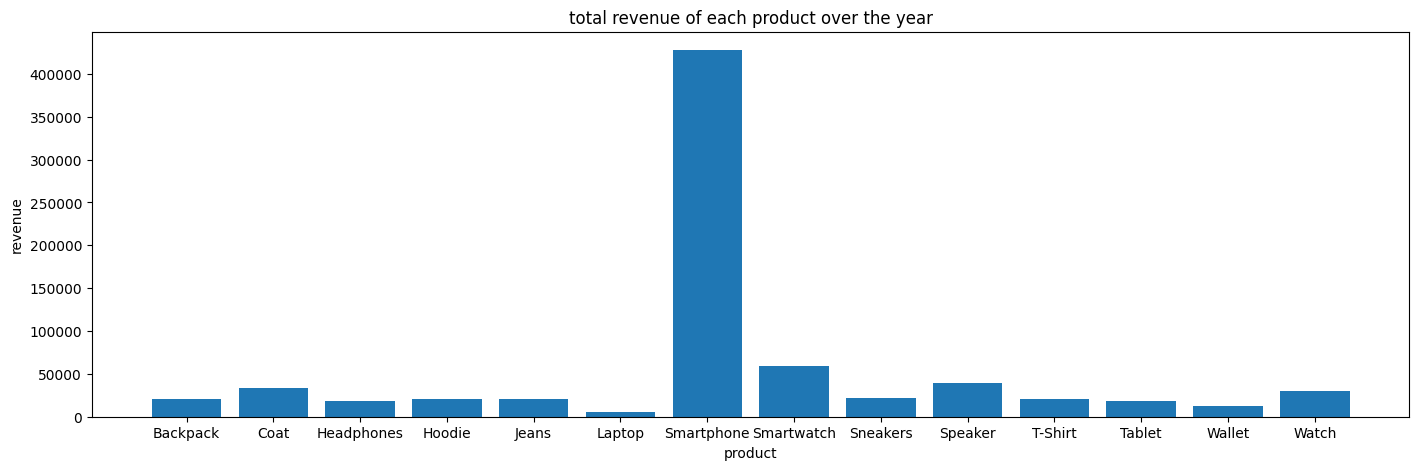

In [ ]:
max_prod_rev = df.groupby('product').revenue.sum()
max_prod_rev
plt.figure(figsize=(15, 5))
x = max_prod_rev.index.tolist()
y = max_prod_rev.values.tolist()
plt.xlabel('product')
plt.ylabel('revenue')
plt.title('total revenue of each product over the year')
plt.bar(x, y)
print('highest revenue is: ', max_prod_rev.max())

What is average price of a product sold by the company over the course of the year?

In [ ]:
avg_price = df['price'].mean()
print(" average price of a product sold by the company is: ",avg_price)

 average price of a product sold by the company is:  210.1917808219178


what is the total quantity of products sold by the company?

In [ ]:
total_quantity = df['quantity'].sum()
print(" total quantity of products sold by the company is: ",total_quantity)

 total quantity of products sold by the company is:  5300.0


Which product has highest revenue?

highest revenue is:  509480.0


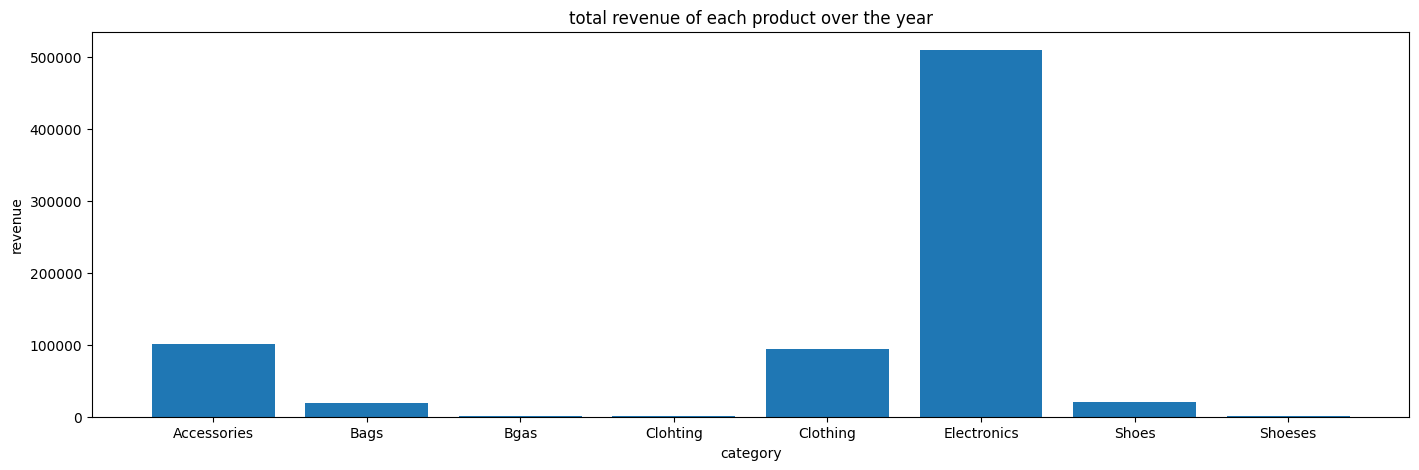

In [ ]:
max_cat_rev = df.groupby('category').revenue.sum()
plt.figure(figsize=(17, 5))
x = max_cat_rev.index.tolist()
y = max_cat_rev.values.tolist()
plt.xlabel('category')
plt.ylabel('revenue')
plt.title('total revenue of each product over the year')
plt.bar(x, y)
print('highest revenue is: ', max_cat_rev.max())

In [ ]:
avg_rev = df['revenue'].mean()
print(" average revenue per sale is: ",avg_rev)

 average revenue per sale is:  2050.4931506849316


Which Quarter has highest revenue?

highest revenue is:  195430.0


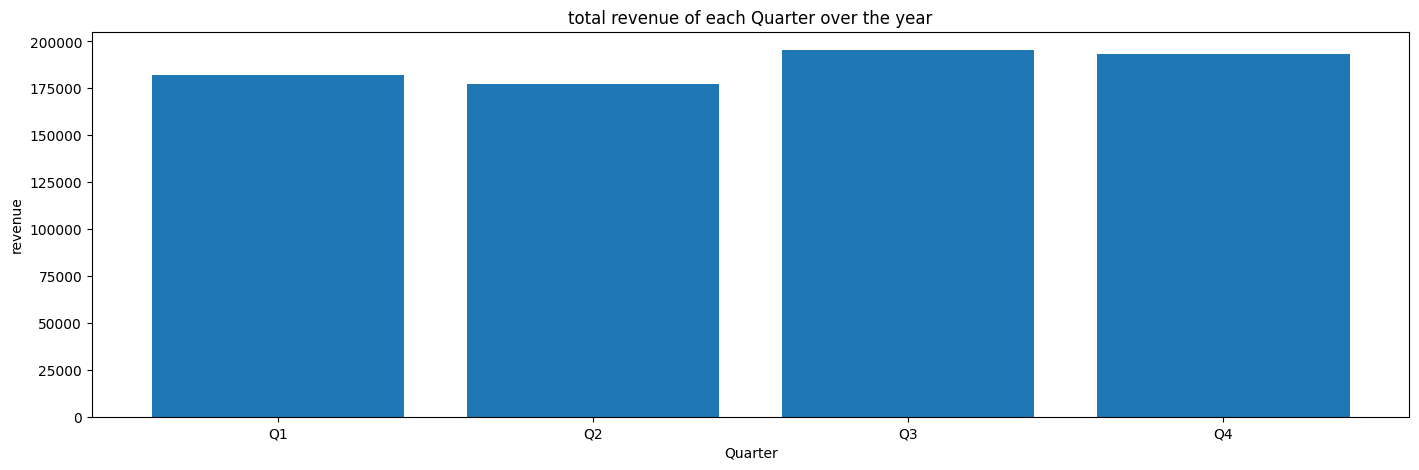

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['Quarter'] = df['date'].dt.quarter
# display the dataframe

total_q_rev = df.groupby('Quarter').revenue.sum()
plt.figure(figsize=(17, 5))
x = total_q_rev.index.tolist()
y = total_q_rev.values.tolist()
plt.xlabel('Quarter')
plt.ylabel('revenue')
plt.title('total revenue of each Quarter over the year')
plt.bar(x, y)
plt.xticks(ticks=[1,2,3,4], labels=['Q1', 'Q2', 'Q3', 'Q4']);
print('highest revenue is: ', total_q_rev.max())


highest revenue is:  1005.0


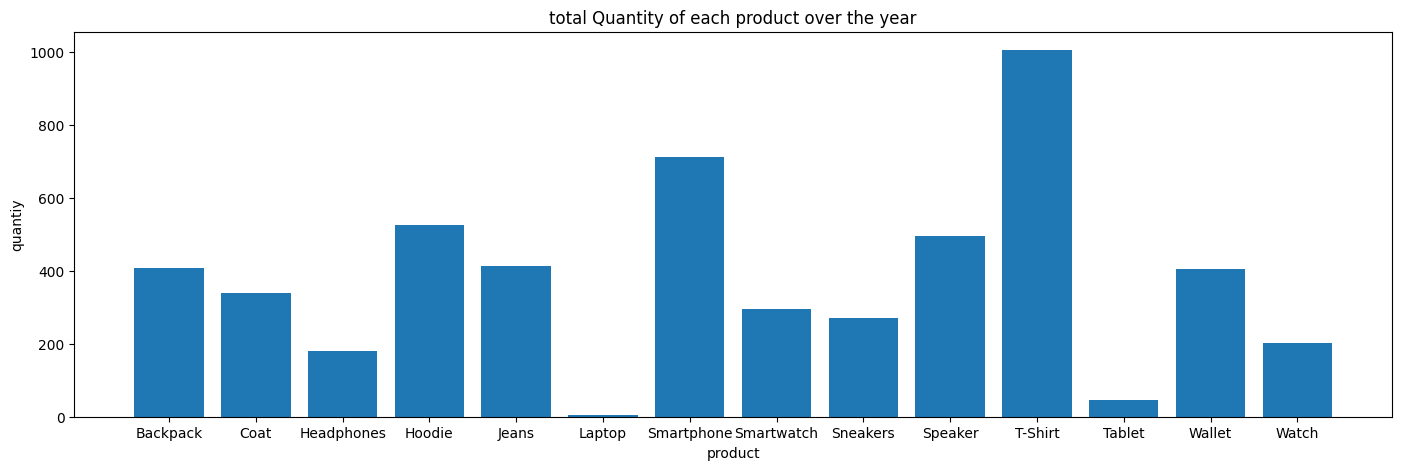

In [ ]:
max_prod_quant = df.groupby('product').quantity.sum()
max_prod_quant
plt.figure(figsize=(17, 5))
x = max_prod_quant.index.tolist()
y = max_prod_quant.values.tolist()
plt.xlabel('product')
plt.ylabel('quantiy')
plt.title('total Quantity of each product over the year')
plt.bar(x, y)
print('highest revenue is: ', max_prod_quant.max())

In [ ]:
px.sunburst(df, path=['category', 'product'], values='revenue', title='Gender Total bill per day')